(200,)


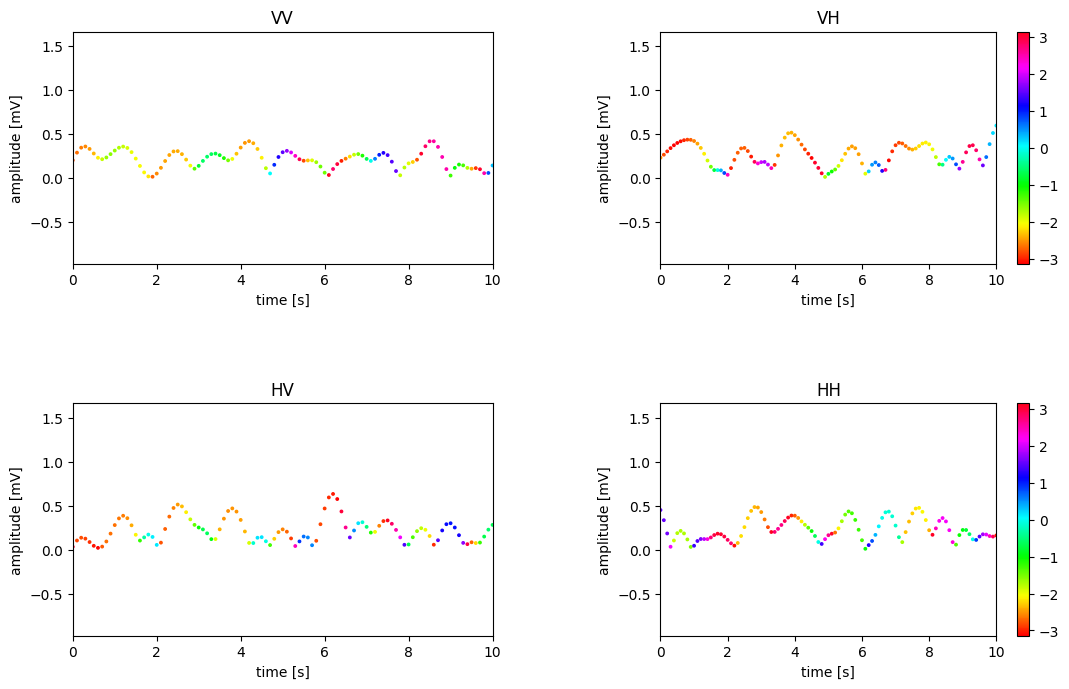

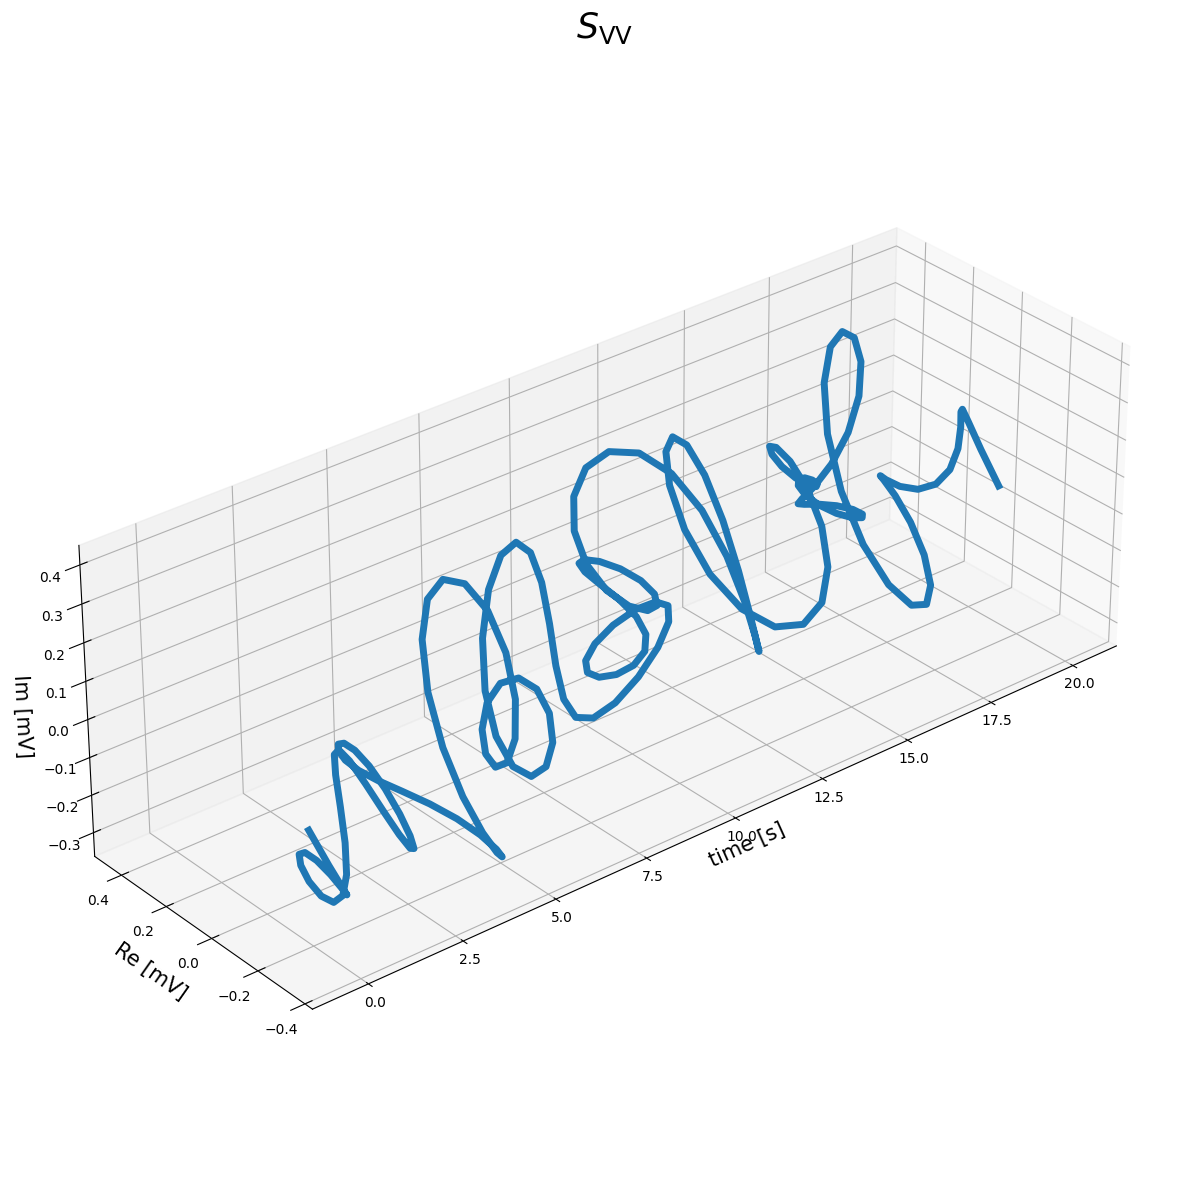

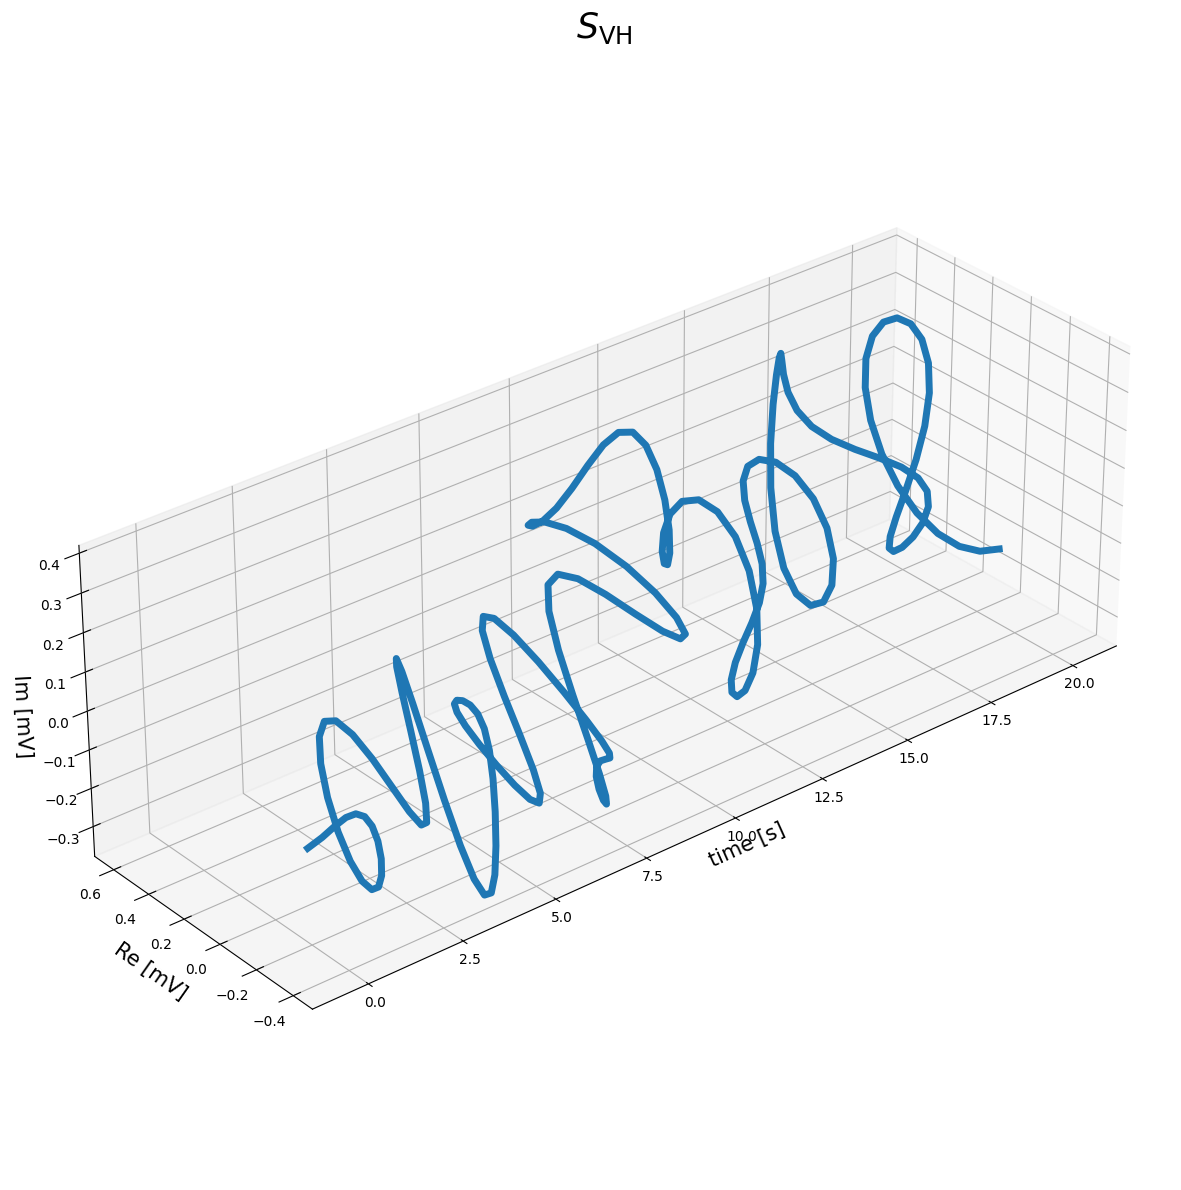

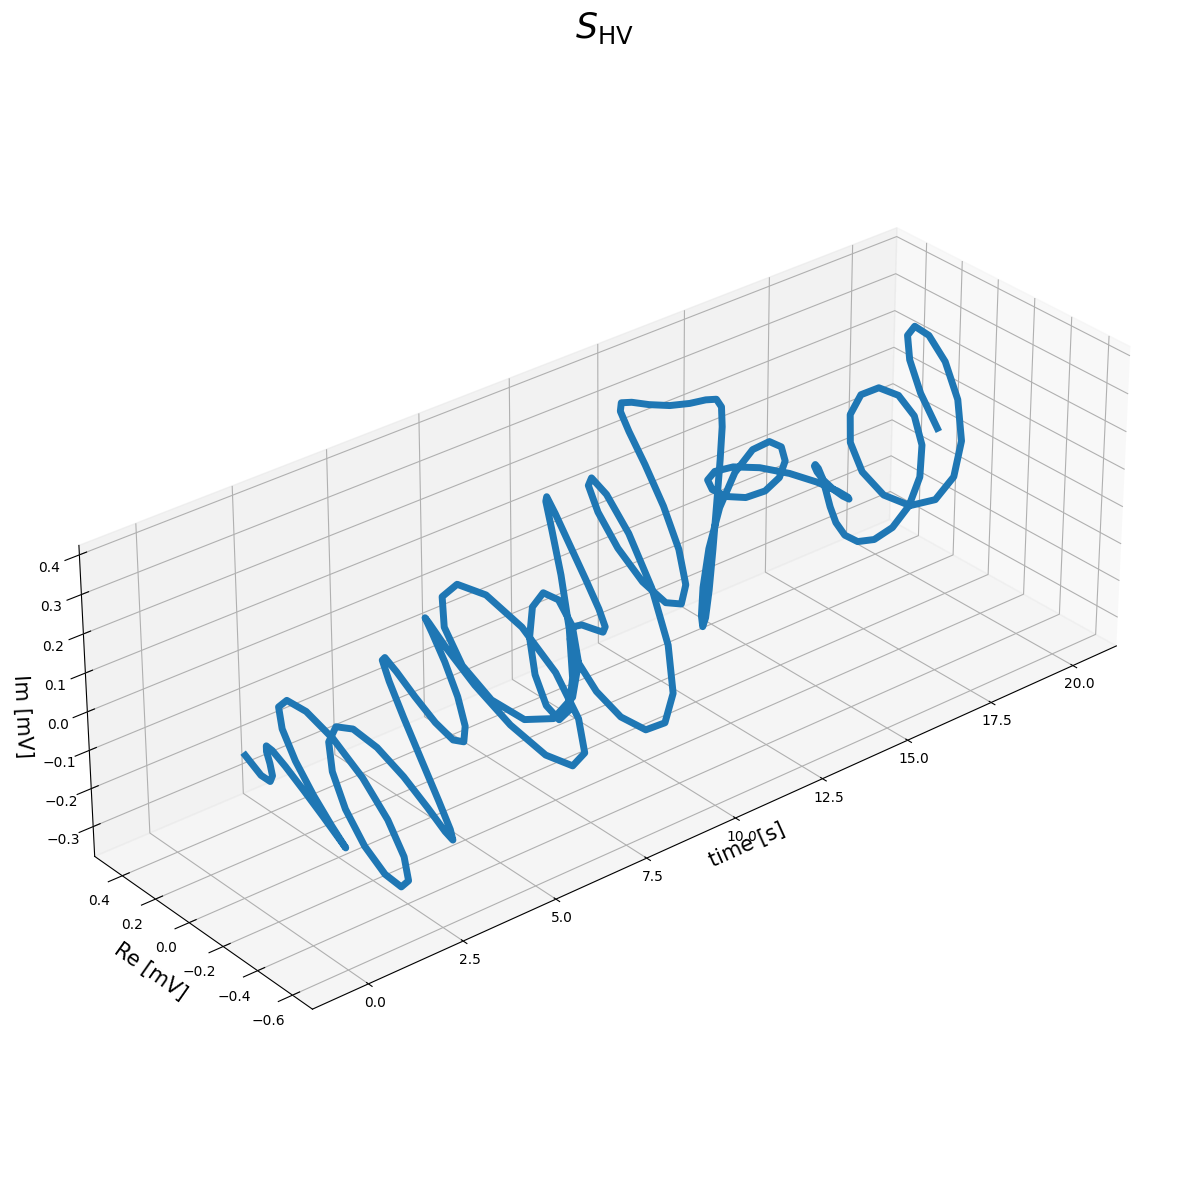

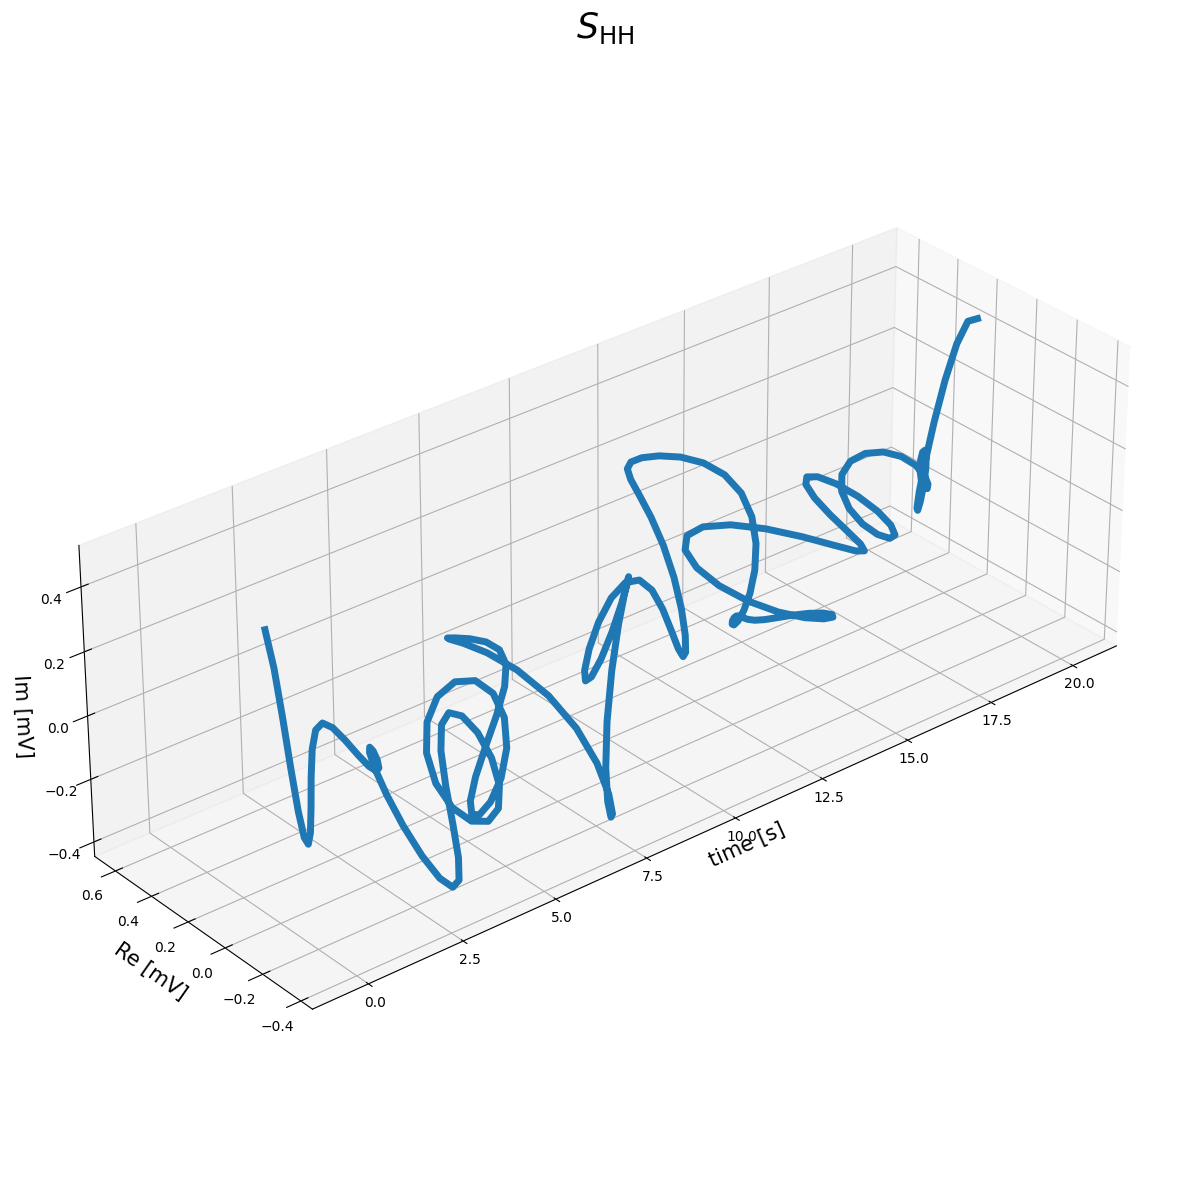

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import os

f = "../data/20230203_standing_10_5M.dat"
df = np.genfromtxt(os.path.join(f), delimiter=",")
df = (df-2048)/2048*100 #DA変換 [mV]

#N = df.shape[0]           # サンプル数
N=400
freq = 20 # 周波数
tmax = N/freq #計測時間
# データのパラメータ

dt = 1/freq          # サンプリング間隔
fc = 2  # カットオフ周波数
t = np.arange(0, N*dt, dt)  # 時間軸
fq = np.linspace(0, 1.0/dt, N//2)  # 周波数軸

# Tx1-Rx1 Svv=I1+jQ1
I1 = df[0:N:2, 0]
Q1 = df[0:N:2, 1]
#A1 = np.sqrt((I1 **2 + Q1 ** 2))
#P1=(np.arctan2(Q1,I1))
# Tx1-Rx2 Svh=I2+jQ2
I2 = df[0:N:2, 2]
Q2 = df[0:N:2, 3]
#A2 = np.sqrt((I2 ** 2 + Q2 ** 2))
#P2=(np.arctan2(Q2,I2))
# Tx2-Rx1 Shv=I3+jQ3
I3 = df[1:N:2, 0]
Q3 = df[1:N:2, 1]
#A3 = np.sqrt((I3 ** 2 + Q3 ** 2))
#P3=(np.arctan2(Q3,I3))
# Tx2-Rx2 Shh=I4+jQ4
I4 = df[1:N:2, 2]
Q4 = df[1:N:2, 3]
#A4 = np.sqrt((I4 ** 2 + Q4 ** 2))
#P4=(np.arctan2(Q4,I4))

# 高速フーリエ変換（周波数信号に変換）
F1 = np.fft.fft(I1)
F2 = np.fft.fft(I2)
F3 = np.fft.fft(I3)
F4 = np.fft.fft(I4)
G1 = np.fft.fft(Q1) 
G2 = np.fft.fft(Q2)
G3 = np.fft.fft(Q3)
G4 = np.fft.fft(Q4)

# 正規化 + 交流成分2倍
F1 = F1/(N/2/2)
F1[0] = F1[0]/2
F2 = F2/(N/2/2)
F2[0] = F2[0]/2
F3 = F3/(N/2/2)
F3[0] = F3[0]/2
F4 = F4/(N/2/2)
F4[0] = F4[0]/2
G1 = G1/(N/2/2)
G1[0] = G1[0]/2
G2 = G2/(N/2/2)
G2[0] = G2[0]/2
G3 = G3/(N/2/2)
G3[0] = G3[0]/2
G4 = G4/(N/2/2)
G4[0] = G4[0]/2

# 配列Fをコピー
FF1 = F1.copy()
FF2 = F2.copy()
FF3 = F3.copy()
FF4 = F4.copy()
GG1 = G1.copy()
GG2 = G2.copy()
GG3 = G3.copy()
GG4 = G4.copy()

print(FF1.shape)
# ローパスフィル処理（カットオフ周波数を超える帯域の周波数信号を0にする)
FF1[(fq > fc)] = 0
FF2[(fq > fc)] = 0
FF3[(fq > fc)] = 0
FF4[(fq > fc)] = 0
GG1[(fq > fc)] = 0
GG2[(fq > fc)] = 0
GG3[(fq > fc)] = 0
GG4[(fq > fc)] = 0
#F2[(freq == 0)] = 0 

# 高速逆フーリエ変換（時間信号に戻す）
f1 = np.fft.ifft(FF1)
f2 = np.fft.ifft(FF2)
f3 = np.fft.ifft(FF3)
f4 = np.fft.ifft(FF4)
g1 = np.fft.ifft(GG1)
g2 = np.fft.ifft(GG2)
g3 = np.fft.ifft(GG3)
g4 = np.fft.ifft(GG4)

# 振幅を元のスケールに戻す
f1 = np.real(f1*N)
f2 = np.real(f2*N)
f3 = np.real(f3*N)
f4 = np.real(f4*N)
g1 = np.real(g1*N)
g2 = np.real(g2*N)
g3 = np.real(g3*N)
g4 = np.real(g4*N)

I1 = f1 - np.mean(f1)
I2 = f2 - np.mean(f2)
I3 = f3 - np.mean(f3)
I4 = f4 - np.mean(f4)
Q1 = g1 - np.mean(g1)
Q2 = g2 - np.mean(g2)
Q3 = g3 - np.mean(g3)
Q4 = g4 - np.mean(g4)

A1 = np.sqrt((I1 **2 + Q1 ** 2))
P1=(np.arctan2(Q1,I1))
A2 = np.sqrt((I2 ** 2 + Q2 ** 2))
P2=(np.arctan2(Q2,I2))
A3 = np.sqrt((I3 ** 2 + Q3 ** 2))
P3=(np.arctan2(Q3,I3))
A4 = np.sqrt((I4 ** 2 + Q4 ** 2))
P4=(np.arctan2(Q4,I4))

vmax = max(A1.max(),A2.max(),A3.max(),A4.max())
vmin = max(A1.min(),A2.min(),A3.min(),A4.min())

t1= np.arange(0,np.size(A1))/freq*2
t2= np.arange(0,np.size(A3))/freq*2


fig = plt.figure(figsize=(13, 8),dpi=100)  # Figureを設定
plt.subplots_adjust(wspace=0.4, hspace=0.6)
#Tx1-Rx1
ax1 = fig.add_subplot(2, 2, 1)   #1行4列の1番目
cm = plt.cm.get_cmap('hsv') # カラーマップ
mappable = ax1.scatter(t1, A1, c=P1, vmin=-(np.pi), vmax=np.pi, s=3, cmap=cm)
#fig.colorbar(mappable, ax=ax1 ) # カラーバーを付加
plt.title("VV",fontsize=12)
plt.xlabel("time [s]", fontsize=10)
plt.ylabel("amplitude [mV]", fontsize=10)
plt.xlim(0,10)
plt.ylim(vmin-1,vmax+1)

#Tx1-Rx2
ax2 = fig.add_subplot(2, 2, 2)   #1行4列の2番目
cm = plt.cm.get_cmap('hsv') # カラーマップ
mappable = ax2.scatter(t1, A2, c=P2, vmin=-(np.pi), vmax=np.pi, s=3, cmap=cm)
fig.colorbar(mappable, ax=ax2 ) # カラーバーを付加
plt.title("VH",fontsize=12)
plt.xlabel("time [s]", fontsize=10)
plt.ylabel("amplitude [mV]", fontsize=10)
plt.xlim(0,10)
plt.ylim(vmin-1,vmax+1)

#Tx2-Rx1
ax3 = fig.add_subplot(2, 2, 3)   #1行4列の3番目
cm = plt.cm.get_cmap('hsv') # カラーマップ
mappable = ax3.scatter(t2, A3, c=P3, vmin=-(np.pi), vmax=np.pi, s=3, cmap=cm)
#fig.colorbar(mappable, ax=ax2 ) # カラーバーを付加
plt.title("HV",fontsize=12)
plt.xlabel("time [s]", fontsize=10)
plt.ylabel("amplitude [mV]", fontsize=10)
plt.xlim(0,10)
plt.ylim(vmin-1,vmax+1)

#Tx2-Rx2
ax4 = fig.add_subplot(2, 2, 4)   #1行4列の4番目
cm = plt.cm.get_cmap('hsv') # カラーマップ
mappable = ax4.scatter(t2, A4, c=P4, vmin=-(np.pi), vmax=np.pi, s=3, cmap=cm)
fig.colorbar(mappable, ax=ax4 ) # カラーバーを付加
plt.title("HH",fontsize=12)
plt.xlabel("time [s]", fontsize=10)
plt.ylabel("amplitude [mV]", fontsize=10)
plt.xlim(0,10)
plt.ylim(vmin-1,vmax+1)

savename = os.path.basename(f).strip('.dat').strip('../data/')

plt.savefig(os.path.join("../img", savename+"_AmPh_"+str(freq)+"Hz_x"))
plt.show()

fig1 = plt.figure(facecolor="white", figsize=(16, 12),dpi=100)
ax1 = fig1.add_subplot(projection="3d")
ax1.view_init(elev=30, azim=-130)
ax1.set_box_aspect((3,1,1))
ax1.set_title("$S_\mathrm{VV}$",size = 25)
ax1.set_xlabel("time [s]",size=15)
ax1.set_ylabel("Re [mV]",size=15)
ax1.set_zlabel("Im [mV]",size=15)
ax1.plot(t1,I1,Q1,lw=5)
#ax1.scatter(I1,Q1,lw=0.5)
plt.tight_layout()
plt.savefig(os.path.join("../img", savename+"_Svv_x"))
plt.show()

fig2 = plt.figure(facecolor="white", figsize=(16, 12),dpi=100)
ax2 = fig2.add_subplot(projection="3d")
ax2.view_init(elev=30, azim=-130)
ax2.set_box_aspect((3,1,1))
ax2.set_title("$S_\mathrm{VH}$",size = 25)
ax2.set_xlabel("time [s]",size=15)
ax2.set_ylabel("Re [mV]",size=15)
ax2.set_zlabel("Im [mV]",size=15)
ax2.plot(t1,I2,Q2,lw=5)
#ax2.scatter(I2,Q2,lw=0.5)
plt.tight_layout()
plt.savefig(os.path.join("../img", savename+"_Svh_x"))
plt.show()

fig3 = plt.figure(facecolor="white", figsize=(16, 12),dpi=100)
ax3 = fig3.add_subplot(projection="3d")
ax3.view_init(elev=30, azim=-130)
ax3.set_box_aspect((3,1,1))
ax3.set_title("$S_\mathrm{HV}$", size = 25)
ax3.set_xlabel("time [s]",size=15)
ax3.set_ylabel("Re [mV]",size=15)
ax3.set_zlabel("Im [mV]",size=15)
ax3.plot(t2,I3,Q3,lw=5)
#ax3.scatter(I3,Q3,lw=0.5)
plt.tight_layout()
plt.savefig(os.path.join("../img", savename+"_Shv_x"))
plt.show()

fig4 = plt.figure(facecolor="white", figsize=(16, 12),dpi=100)
ax4 = fig4.add_subplot(projection="3d")
ax4.view_init(elev=30, azim=-130)
ax4.set_box_aspect((3,1,1))
ax4.set_title("$S_\mathrm{HH}$",size = 25)
ax4.set_xlabel("time [s]",size=15)
ax4.set_ylabel("Re [mV]",size=15)
ax4.set_zlabel("Im [mV]",size=15)
ax4.plot(t2,I4,Q4,lw=5)
#ax4.scatter(I4,Q4,lw=0.5)
plt.tight_layout()
plt.savefig(os.path.join("../img", savename+"_Shh_x"))
plt.show()

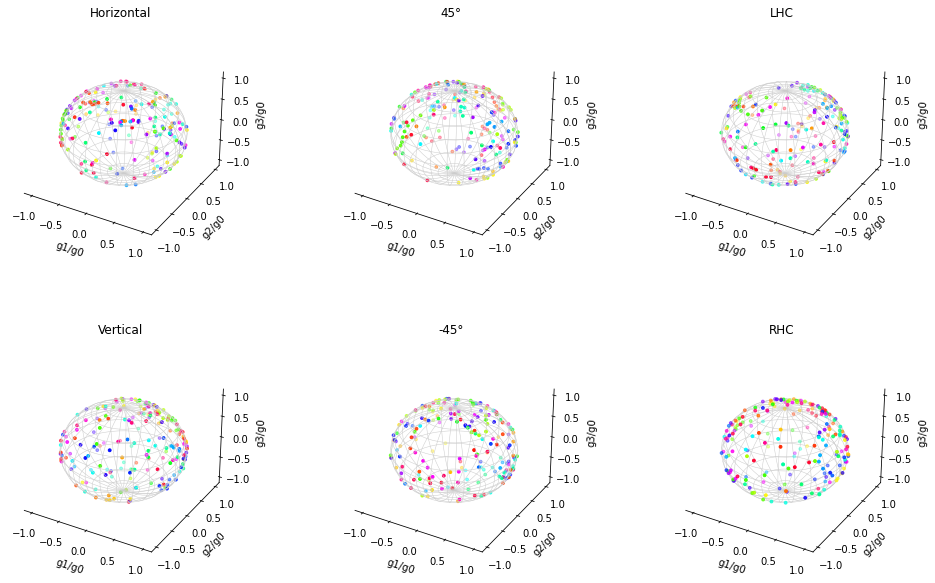

finished


In [114]:

#送信-水平偏波
g0 = (A4**2)+(A3**2) # |Shh|^2+|Svh|^2
g1 = (A4**2)-(A3**2) # |Shh|^2-|Svh|^2
g2= 2*(I3*I4+Q3*Q4)  # 2Re(Shh`*Svh)
g3= 2*(I4*Q3-I3*Q4)  # 2Im(Shh`*Svh)
#送信-垂直偏波
h0 = (A2**2)+(A1**2)
h1 = (A2**2)-(A1**2)
h2= 2*(I1*I2+Q1*Q2)
h3= 2*(I2*Q1-I1*Q2)
#送信‐45度偏波
m0 = 1/2*(((I2+I4)**2+(Q2+Q4)**2)+((I1+I3)**2+(Q1+Q3)**2))
m1 = 1/2*(((I2+I4)**2+(Q2+Q4)**2)-((I1+I3)**2+(Q1+Q3)**2))
m2 = 2*1/2*((I1+I3)*(I2+I4)+(Q1+Q3)*(Q2+Q4))
m3 = 2*1/2*((Q1+Q3)*(I2+I4)-(I1+I3)*(Q2+Q4))
#送信‐‐45度偏波
n0 = 1/2*(((I2-I4)**2+(Q2-Q4)**2)+((I1-I3)**2+(Q1-Q3)**2))
n1 = 1/2*(((I2-I4)**2+(Q2-Q4)**2)-((I1-I3)**2+(Q1-Q3)**2))
n2 = 2*1/2*((I1-I3)*(I2-I4)+(Q1-Q3)*(Q2-Q4))
n3 = 2*1/2*((Q1-Q3)*(I2-I4)-(I1-I3)*(Q2-Q4))
#送信-左円偏波
l0 = 1/2*(((I4-Q2)**2+(Q4+I2)**2)+((I3-Q1)**2+(Q3+I1)**2))
l1 = 1/2*(((I4-Q2)**2+(Q4+I2)**2)-((I3-Q1)**2+(Q3+I1)**2))
l2 = 2*1/2*((I3-Q1)*(I4-Q2)+(Q3+I1)*(Q4+I2))
l3 = 2*1/2*((Q3+I1)*(I4-Q2)-(I3-Q1)*(Q4+I2))
#送信-右円偏波
r0 = 1/2*(((I2-Q4)**2+(Q2+I4)**2)+((I1-Q3)**2+(Q1+I3)**2))
r1 = 1/2*(((I2-Q4)**2+(Q2+I4)**2)-((I1-Q3)**2+(Q1+I3)**2))
r2 = 2*1/2*((I1-Q3)*(I2-Q4)+(Q1+I3)*(Q2+I4))
r3 = 2*1/2*((Q1+I3)*(I2-Q4)-(I1-Q3)*(Q2+I4))


#図の作製
fig = plt.figure(figsize=(17.5,10))  # Figureを設定
plt.subplots_adjust(wspace=0.05, hspace=0.4)

#水平
ax1 = fig.add_subplot(2, 3, 1,projection='3d')   #2行3列の1番目
ax1.w_xaxis.set_pane_color((0., 0., 0., 0.))
ax1.w_yaxis.set_pane_color((0., 0., 0., 0.))
ax1.w_zaxis.set_pane_color((0., 0., 0., 0.))
ax1.set_title("Horizontal",fontsize=12)
ax1.set_xlabel("g1/g0")
ax1.set_ylabel("g2/g0")
ax1.set_zlabel("g3/g0")
ax1.grid(color="white")
ax1.grid(False)
# sphere
u,v=np.mgrid[0:2*np.pi:50j, 0:np.pi:25j]
x=np.cos(u)*np.sin(v)
y=np.sin(u)*np.sin(v)
z=np.cos(v)
ax1.plot_wireframe(x, y, z, color='0.8', linewidth=0.5,rstride =2, cstride = 2) # alpha=1
ax1.set_xticks(np.linspace(-1.0, 1.0, 5))
ax1.set_yticks(np.linspace(-1.0, 1.0, 5))
ax1.set_zticks(np.linspace(-1.0, 1.0, 5))

#垂直
ax4 = fig.add_subplot(2, 3, 4,projection='3d')   #2行3列の4番目
ax4.w_xaxis.set_pane_color((0., 0., 0., 0.))
ax4.w_yaxis.set_pane_color((0., 0., 0., 0.))
ax4.w_zaxis.set_pane_color((0., 0., 0., 0.))
ax4.set_title("Vertical",fontsize=12)
ax4.set_xlabel("g1/g0")
ax4.set_ylabel("g2/g0")
ax4.set_zlabel("g3/g0")
ax4.grid(color="white")
ax4.grid(False)
# sphere
u,v=np.mgrid[0:2*np.pi:50j, 0:np.pi:25j]
x=np.cos(u)*np.sin(v)
y=np.sin(u)*np.sin(v)
z=np.cos(v)
ax4.plot_wireframe(x, y, z, color='0.8', linewidth=0.5,rstride =2, cstride = 2) # alpha=1
ax4.set_xticks(np.linspace(-1.0, 1.0, 5))
ax4.set_yticks(np.linspace(-1.0, 1.0, 5))
ax4.set_zticks(np.linspace(-1.0, 1.0, 5))

#45度
ax2 = fig.add_subplot(2, 3, 2,projection='3d')   #2行3列の2番目
ax2.w_xaxis.set_pane_color((0., 0., 0., 0.))
ax2.w_yaxis.set_pane_color((0., 0., 0., 0.))
ax2.w_zaxis.set_pane_color((0., 0., 0., 0.))
ax2.set_title("45°",fontsize=12)
ax2.set_xlabel("g1/g0")
ax2.set_ylabel("g2/g0")
ax2.set_zlabel("g3/g0")
ax2.grid(color="white")
ax2.grid(False)
# sphere
u,v=np.mgrid[0:2*np.pi:50j, 0:np.pi:25j]
x=np.cos(u)*np.sin(v)
y=np.sin(u)*np.sin(v)
z=np.cos(v)
ax2.plot_wireframe(x, y, z, color='0.8', linewidth=0.5,rstride =2, cstride = 2) # alpha=1
ax2.set_xticks(np.linspace(-1.0, 1.0, 5))
ax2.set_yticks(np.linspace(-1.0, 1.0, 5))
ax2.set_zticks(np.linspace(-1.0, 1.0, 5))

#‐45度
ax5 = fig.add_subplot(2, 3, 5,projection='3d')   #2行3列の5番目
ax5.w_xaxis.set_pane_color((0., 0., 0., 0.))
ax5.w_yaxis.set_pane_color((0., 0., 0., 0.))
ax5.w_zaxis.set_pane_color((0., 0., 0., 0.))
ax5.set_title("-45°",fontsize=12)
ax5.set_xlabel("g1/g0")
ax5.set_ylabel("g2/g0")
ax5.set_zlabel("g3/g0")
ax5.grid(color="white")
ax5.grid(False)
# sphere
u,v=np.mgrid[0:2*np.pi:50j, 0:np.pi:25j]
x=np.cos(u)*np.sin(v)
y=np.sin(u)*np.sin(v)
z=np.cos(v)
ax5.plot_wireframe(x, y, z, color='0.8', linewidth=0.5,rstride =2, cstride = 2) # alpha=1
ax5.set_xticks(np.linspace(-1.0, 1.0, 5))
ax5.set_yticks(np.linspace(-1.0, 1.0, 5))
ax5.set_zticks(np.linspace(-1.0, 1.0, 5))

#左円
ax3 = fig.add_subplot(2, 3, 3,projection='3d')   #2行3列の3番目
ax3.w_xaxis.set_pane_color((0., 0., 0., 0.))
ax3.w_yaxis.set_pane_color((0., 0., 0., 0.))
ax3.w_zaxis.set_pane_color((0., 0., 0., 0.))
ax3.set_title("LHC",fontsize=12)
ax3.set_xlabel("g1/g0")
ax3.set_ylabel("g2/g0")
ax3.set_zlabel("g3/g0")
ax3.grid(color="white")
ax3.grid(False)
# sphere
u,v=np.mgrid[0:2*np.pi:50j, 0:np.pi:25j]
x=np.cos(u)*np.sin(v)
y=np.sin(u)*np.sin(v)
z=np.cos(v)
ax3.plot_wireframe(x, y, z, color='0.8', linewidth=0.5,rstride =2, cstride = 2) # alpha=1
ax3.set_xticks(np.linspace(-1.0, 1.0, 5))
ax3.set_yticks(np.linspace(-1.0, 1.0, 5))
ax3.set_zticks(np.linspace(-1.0, 1.0, 5))

#右円
ax6 = fig.add_subplot(2, 3, 6,projection='3d')   #2行3列の6番目
ax6.w_xaxis.set_pane_color((0., 0., 0., 0.))
ax6.w_yaxis.set_pane_color((0., 0., 0., 0.))
ax6.w_zaxis.set_pane_color((0., 0., 0., 0.))
ax6.set_title("RHC",fontsize=12)
ax6.set_xlabel("g1/g0")
ax6.set_ylabel("g2/g0")
ax6.set_zlabel("g3/g0")
ax6.grid(color="white")
ax6.grid(False)
# sphere
u,v=np.mgrid[0:2*np.pi:50j, 0:np.pi:25j]
x=np.cos(u)*np.sin(v)
y=np.sin(u)*np.sin(v)
z=np.cos(v)
ax6.plot_wireframe(x, y, z, color='0.8', linewidth=0.5,rstride =2, cstride = 2) # alpha=1
ax6.set_xticks(np.linspace(-1.0, 1.0, 5))
ax6.set_yticks(np.linspace(-1.0, 1.0, 5))
ax6.set_zticks(np.linspace(-1.0, 1.0, 5))

# plotdata
cm = plt.cm.get_cmap('hsv') # カラーマップ
ax1.scatter(g1/g0, g2/g0, g3/g0, c=P4, vmin=-(np.pi), vmax=np.pi, s=8, cmap=cm)
ax4.scatter(h1/h0, h2/h0, h3/h0, c=P4, vmin=-(np.pi), vmax=np.pi, s=8, cmap=cm)
ax2.scatter(m1/m0, m2/m0, m3/m0, c=P4, vmin=-(np.pi), vmax=np.pi, s=8, cmap=cm)
ax5.scatter(n1/n0, n2/n0, n3/n0, c=P4, vmin=-(np.pi), vmax=np.pi, s=8, cmap=cm)
ax3.scatter(l1/l0, l2/l0, l3/l0, c=P4, vmin=-(np.pi), vmax=np.pi, s=8, cmap=cm)
ax6.scatter(r1/r0, r2/r0, r3/r0, c=P4, vmin=-(np.pi), vmax=np.pi, s=8, cmap=cm)


#plt.savefig("{0}_{1}_{2}_PS_2".format(date,action,round))
plt.savefig(os.path.join("../img", savename+"_PS_x"))

plt.show()

print("finished")
#RG=np.exp(1j*P4)
#print(RG)
#print(g1/g0*RG)
#print(g1/g0)

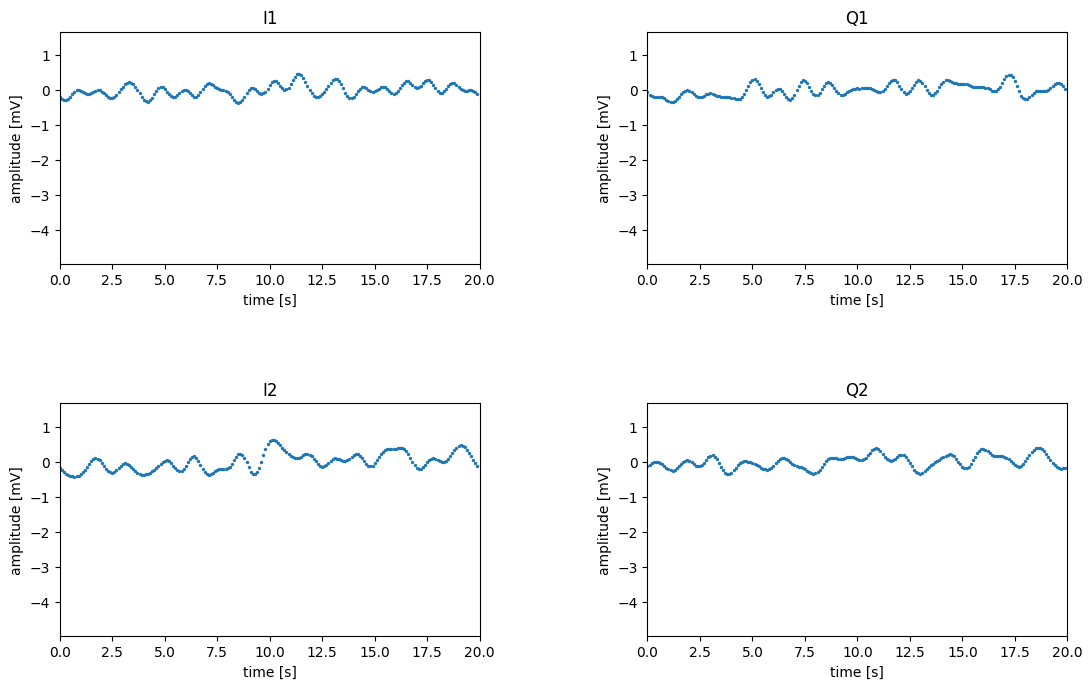

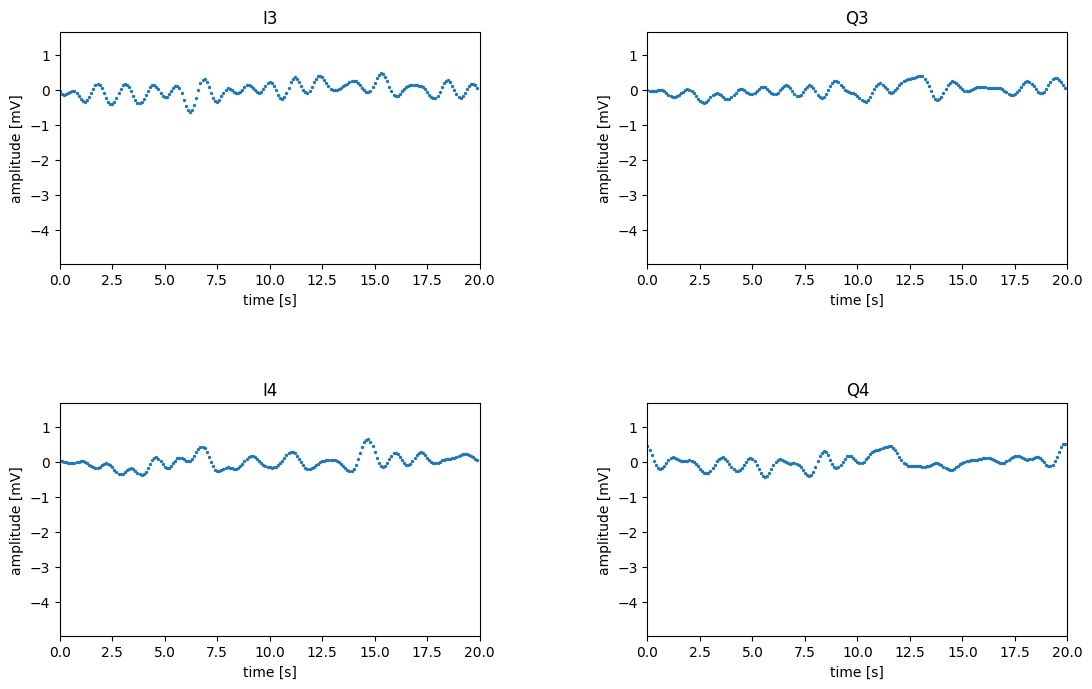

In [115]:
fig = plt.figure(figsize=(13, 8),dpi=100)  # Figureを設定
plt.subplots_adjust(wspace=0.4, hspace=0.6)
#Tx1-Rx1
ax1 = fig.add_subplot(2, 2, 1)   #1行4列の1番目
mappable = ax1.scatter(t1, I1,s=2)
plt.title("I1",fontsize=12)
plt.xlabel("time [s]", fontsize=10)
plt.ylabel("amplitude [mV]", fontsize=10)
plt.xlim(0,tmax)
plt.ylim(vmin-5,vmax+1)

#Tx1-Rx2
ax2 = fig.add_subplot(2, 2, 2)   #1行4列の2番目
ax2.scatter(t1, Q1,s=2)
plt.title("Q1",fontsize=12)
plt.xlabel("time [s]", fontsize=10)
plt.ylabel("amplitude [mV]", fontsize=10)
plt.xlim(0,tmax)
plt.ylim(vmin-5,vmax+1)

#Tx2-Rx1
ax3 = fig.add_subplot(2, 2, 3)   #1行4列の3番目
ax3.scatter(t2, I2,s=2)
#fig.colorbar(mappable, ax=ax2 ) # カラーバーを付加
plt.title("I2",fontsize=12)
plt.xlabel("time [s]", fontsize=10)
plt.ylabel("amplitude [mV]", fontsize=10)
plt.xlim(0,tmax)
plt.ylim(vmin-5,vmax+1)

#Tx2-Rx2
ax4 = fig.add_subplot(2, 2, 4)   #1行4列の4番目
ax4.scatter(t2, Q2,s=2)
plt.title("Q2",fontsize=12)
plt.xlabel("time [s]", fontsize=10)
plt.ylabel("amplitude [mV]", fontsize=10)
plt.xlim(0,tmax)
plt.ylim(vmin-5,vmax+1)
#plt.savefig("1.png")
plt.show()

fig = plt.figure(figsize=(13, 8),dpi=100)  # Figureを設定
plt.subplots_adjust(wspace=0.4, hspace=0.6)
#Tx1-Rx1
ax1 = fig.add_subplot(2, 2, 1)   #1行4列の1番目
ax1.scatter(t1, I3,s=2)
#fig.colorbar(mappable, ax=ax1 ) # カラーバーを付加
plt.title("I3",fontsize=12)
plt.xlabel("time [s]", fontsize=10)
plt.ylabel("amplitude [mV]", fontsize=10)
plt.xlim(0,tmax)
plt.ylim(vmin-5,vmax+1)

#Tx1-Rx2
ax2 = fig.add_subplot(2, 2, 2)   #1行4列の2番目
ax2.scatter(t1, Q3,s=2)
plt.title("Q3",fontsize=12)
plt.xlabel("time [s]", fontsize=10)
plt.ylabel("amplitude [mV]", fontsize=10)
plt.xlim(0,tmax)
plt.ylim(vmin-5,vmax+1)

#Tx2-Rx1
ax3 = fig.add_subplot(2, 2, 3)   #1行4列の3番目
ax3.scatter(t2, I4,s=2)
plt.title("I4",fontsize=12)
plt.xlabel("time [s]", fontsize=10)
plt.ylabel("amplitude [mV]", fontsize=10)
plt.xlim(0,tmax)
plt.ylim(vmin-5,vmax+1)

#Tx2-Rx2
ax4 = fig.add_subplot(2, 2, 4)   #1行4列の4番目
ax4.scatter(t2, Q4,s=2)
plt.title("Q4",fontsize=12)
plt.xlabel("time [s]", fontsize=10)
plt.ylabel("amplitude [mV]", fontsize=10)
plt.xlim(0,tmax)
plt.ylim(vmin-5,vmax+1)
#plt.savefig("2.png")
plt.show()

(-4.977697809776523, 1.6661898976403977)

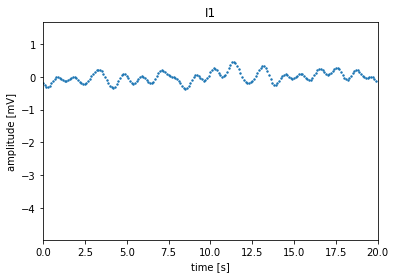

In [116]:
plt.scatter(t1, I1,s=2)
plt.title("I1",fontsize=12)
plt.xlabel("time [s]", fontsize=10)
plt.ylabel("amplitude [mV]", fontsize=10)
plt.xlim(0,tmax)
plt.ylim(vmin-5,vmax+1)

In [117]:
# from scipy import linalg